# Chpater 17:  Pandas for Panel Data

### 17.3 Slicing and Reshaping

In [1]:
import pandas as pd

# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 6) 

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/realwage.csv')

In [2]:
realwage.head()

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


In [3]:
realwage = realwage.pivot_table(values='value',
                                        index='Time',
                                        columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...  \
Series     In 2015 constant prices at 2015 USD exchange rates  ...   
Pay period                                             Annual  ...   
Time                                                           ...   
2006-01-01                                          23,826.64  ...   
2007-01-01                                          24,616.84  ...   
2008-01-01                                          24,185.70  ...   
2009-01-01                                          24,496.84  ...   
2010-01-01                                          24,373.76  ...   

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [4]:
realwage.index = pd.to_datetime(realwage.index)
type(realwage.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
type(realwage.columns)

pandas.core.indexes.multi.MultiIndex

In [6]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

In [7]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

In [9]:
realwage.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  ...  \
Series                In 2015 constant prices at 2015 USD PPPs  ...   
Time       Pay period                                           ...   
2006-01-01 Annual                                    21,042.28  ...   
           Hourly                                        10.09  ...   
2007-01-01 Annual                                    21,310.05  ...   
           Hourly                                        10.22  ...   
2008-01-01 Annual                                    21,416.96  ...   

Country                                                   United Kingdom  \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,376.32   
           Hourly                                                   9.81   
2007-01-01 Annual                                              20,954.13   
           Hourly                                                  10.07   
2008-01-01 Annual                                              20,902.87   

Country                                          United States  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    12,594.40   
           Hourly                                         6.05   
2007-01-01 Annual                                    12,974.40   
           Hourly                                         6.24   
2008-01-01 Annual                                    14,097.56   

Country                                                                   
Series                In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period                                                     
2006-01-01 Annual                                              12,594.40  
           Hourly                                                   6.05  
2007-01-01 Annual                                              12,974.40  
           Hourly                                                   6.24  
2008-01-01 Annual                                              14,097.56  

[5 rows x 64 columns]

In [10]:
realwage.stack(level='Country').head()

Series               In 2015 constant prices at 2015 USD PPPs         \
Pay period                                             Annual Hourly   
Time       Country                                                     
2006-01-01 Australia                                20,410.65  10.33   
           Belgium                                  21,042.28  10.09   
           Brazil                                    3,310.51   1.41   
           Canada                                   13,649.69   6.56   
           Chile                                     5,201.65   2.22   

Series               In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                       Annual Hourly  
Time       Country                                                              
2006-01-01 Australia                                          23,826.64  12.06  
           Belgium                                            20,228.74   9.70  
           Brazil                                              2,032.87   0.87  
           Canada                                             14,335.12   6.89  
           Chile                                               3,333.76   1.42

In [11]:
realwage['2015'].stack(level=(1, 2)).transpose().head()

/var/folders/cw/qph5p4hs3xq46rn9lkw59nr80000gn/T/ipykernel_32274/329490644.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  realwage['2015'].stack(level=(1, 2)).transpose().head()


Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

In [12]:
realwage_f = realwage.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                                  level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


### 17.4 Merging Dataframes and Filling NaNs

In [15]:
worlddata = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/countries.csv', sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


First, we’ll select just the country and continent variables from worlddata and rename the column to ‘Country’

In [16]:
worlddata = worlddata[['Country (en)', 'Continent']]
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


We want to merge our new dataframe, worlddata, with realwage_f

Our dataframes will be merged using country names, requiring us to use the transpose of re- alwage_f so that rows correspond to country names in both dataframes


In [17]:
realwage_f.transpose().head()

Time,2006-01-01,2007-01-01,2008-01-01,...,2014-01-01,2015-01-01,2016-01-01
Country,,,,,,,
Australia,12.06,12.46,12.24,...,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,...,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,...,1.21,1.21,1.24
Canada,6.89,6.96,7.24,...,8.22,8.35,8.48
Chile,1.42,1.45,1.44,...,1.76,1.81,1.91


In [18]:
merged = pd.merge(realwage_f.transpose(), worlddata, how='left', left_index=True, right_on='Country')
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17.00,12.06,12.46,12.24,...,12.98,Australia,Australia
23.00,9.70,9.82,9.87,...,9.76,Belgium,Europe
32.00,0.87,0.92,0.96,...,1.24,Brazil,South America
100.00,6.89,6.96,7.24,...,8.48,Canada,North America
38.00,1.42,1.45,1.44,...,1.91,Chile,South America


Countries that appeared in realwage_f but not in worlddata will have NaN in the Conti- nent column

In [19]:
merged[merged['Continent'].isnull()]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
NaN,3.42,3.74,3.87,...,5.28,Korea,NaN
NaN,0.23,0.45,0.39,...,0.55,Russian Federation,NaN
NaN,1.50,1.64,1.71,...,2.08,Slovak Republic,NaN


In [21]:
missing_continents = {'Korea': 'Asia',
                               'Russian Federation': 'Europe',
                               'Slovak Republic': 'Europe'}

merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents)) 
# Check for whether continents were correctly mapped
merged[merged['Country'] == 'Korea']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
NaN,3.42,3.74,3.87,...,5.28,Korea,Asia


We will also combine the Americas into a single continent - this will make our visualization nicer later on

In [23]:
replace = ['Central America', 'North America', 'South America']
for country in replace: 
    merged['Continent'].replace(to_replace=country,
    value='America', inplace=True)

In [24]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01  ...  2014-01-01  \
Continent Country                                         ...               
America   Brazil            0.87        0.92        0.96  ...        1.21   
          Canada            6.89        6.96        7.24  ...        8.22   
          Chile             1.42        1.45        1.44  ...        1.76   
          Colombia          1.01        1.02        1.01  ...        1.13   
          Costa Rica         NaN         NaN         NaN  ...        2.41   

                      2015-01-01  2016-01-01  
Continent Country                             
America   Brazil            1.21        1.24  
          Canada            8.35        8.48  
          Chile             1.81        1.91  
          Colombia          1.13        1.12  
          Costa Rica        2.56        2.63  

[5 rows x 11 columns]

While merging, we lost our DatetimeIndex, as we merged columns that were not in date- time format

In [25]:
merged.columns

Index([2006-01-01 00:00:00, 2007-01-01 00:00:00, 2008-01-01 00:00:00,
       2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00,
       2012-01-01 00:00:00, 2013-01-01 00:00:00, 2014-01-01 00:00:00,
       2015-01-01 00:00:00, 2016-01-01 00:00:00],
      dtype='object')

In [26]:
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

The DatetimeIndex tends to work more smoothly in the row axis, so we will go ahead and transpose merged

In [27]:
merged = merged.transpose()
merged.head()

Continent  America               ...   Europe                     
Country     Brazil Canada Chile  ... Slovenia Spain United Kingdom
Time                             ...                              
2006-01-01    0.87   6.89  1.42  ...     3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45  ...     3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44  ...     3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52  ...     4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56  ...     4.81  4.30           9.96

[5 rows x 32 columns]

### 17.5 Grouping and Summarizing Data

Using this series, we can plot the average real minimum wage over the past decade for each country in our data set


In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib 
matplotlib.style.use('seaborn')

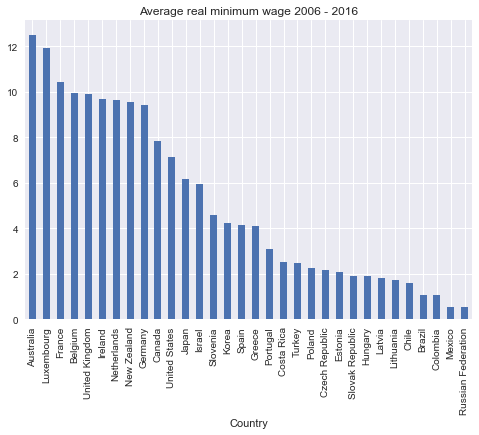

In [32]:
merged.mean().sort_values(ascending=False).plot(kind='bar', title="Average real minimum wage 2006 - 2016")
#Set country labels
country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')
plt.show()

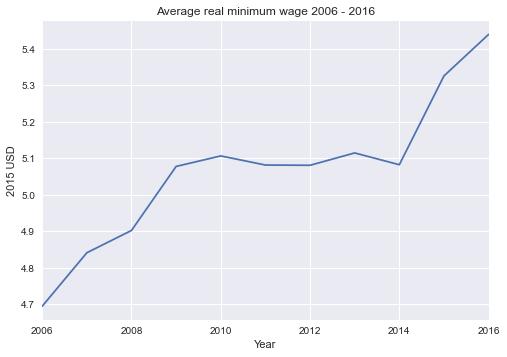

In [33]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

We can plot the average minimum wages in each continent as a time series

/var/folders/cw/qph5p4hs3xq46rn9lkw59nr80000gn/T/ipykernel_32274/859697695.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  merged.mean(level='Continent', axis=1).plot()


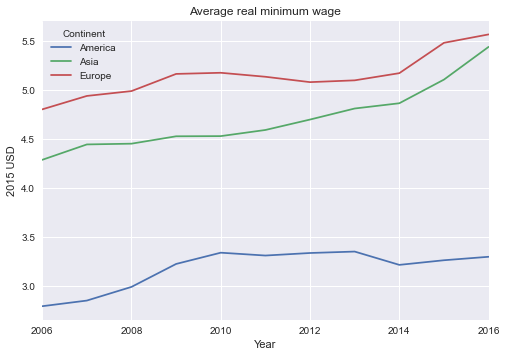

In [35]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

Let’s split merged by continent again, this time using the groupby function, and name the resulting object grouped

In [36]:
grouped = merged.groupby(level='Continent', axis=1)
grouped

/var/folders/cw/qph5p4hs3xq46rn9lkw59nr80000gn/T/ipykernel_32274/3282543486.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.kdeplot(grouped.get_group(continent)['2015'].unstack(), label=continent, shade=True)
/var/folders/cw/qph5p4hs3xq46rn9lkw59nr80000gn/T/ipykernel_32274/3282543486.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.kdeplot(grouped.get_group(continent)['2015'].unstack(), label=continent, shade=True)
/var/folders/cw/qph5p4hs3xq46rn9lkw59nr80000gn/T/ipykernel_32274/3282543486.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and wil

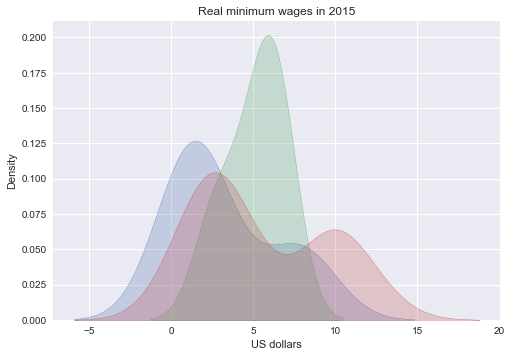

In [38]:
import seaborn as sns
continents = grouped.groups.keys()
for continent in continents:
    sns.kdeplot(grouped.get_group(continent)['2015'].unstack(), label=continent, shade=True)
plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.show()